In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## MNIST

In [3]:
from mnist import MNIST

In [4]:
mnist_loader = MNIST("../data/mnist/")
mnist_loader.gz = True

In [5]:
X, y = mnist_loader.load_training()
_X, _y = mnist_loader.load_testing()

In [6]:
X = np.array(X, dtype='float32') / 255
y = np.array(y, dtype='int16')
_X = np.array(_X, dtype='float32') / 255
_y = np.array(_y, dtype='int16')

#### LR

In [6]:
mnist_lr = LogisticRegression(penalty='l2')

In [7]:
%%time
mnist_lr.fit(X, y)

CPU times: user 1min 17s, sys: 187 ms, total: 1min 17s
Wall time: 1min 19s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
yhat = mnist_lr.predict(_X)
sum(yhat == _y)/len(_y)

0.9201

In [9]:
d = 30

In [10]:
coeffs = np.argsort(mnist_lr.coef_, axis=1)[:,::-1][:,:d]
coeffs

array([[629, 302, 397,  44, 430, 240, 498, 399, 368, 213, 298, 427, 370,
        150, 265, 544, 189, 444, 360, 271, 374, 236, 482, 262, 404, 303,
        125, 453, 127, 513],
       [621, 350, 612,  69, 634, 636, 323, 295, 490, 613, 294, 609, 593,
        381, 436, 578, 351, 489, 598,  71, 548, 579, 406, 145, 462, 661,
        343, 433, 267, 163],
       [474, 390, 418, 446, 501, 425, 696, 557, 389, 391, 528, 473, 611,
        286, 584, 502, 257, 509, 361, 362, 118, 451, 121, 665, 529,  44,
         93, 313, 454, 444],
       [104, 507, 676, 563, 535, 171, 678, 117,  89, 311, 450, 443,  98,
        526, 649, 440, 648, 478, 442, 256, 675, 712, 472, 708, 404, 452,
         96, 395, 274, 143],
       [348, 396, 136, 637, 424, 442, 191, 375, 596, 535, 593, 201, 678,
        399, 517, 516, 468, 494, 373, 478, 411, 374, 257, 219, 404, 436,
        463, 635, 456, 134],
       [333, 332, 362, 304, 305, 276, 221, 444, 482, 306, 192, 334, 723,
        249, 136, 248, 724, 722, 649, 273, 582, 609,

In [12]:
imgs = np.zeros(shape=(10, X.shape[1]))
for i in range(10):
    imgs[i] = X[y == i][0]

In [13]:
features = np.zeros(shape=(10, X.shape[1]))
for idx in range(10):
    features[idx] = [1 if i in coeffs[idx] else 0 for i, x in enumerate(imgs[idx])]

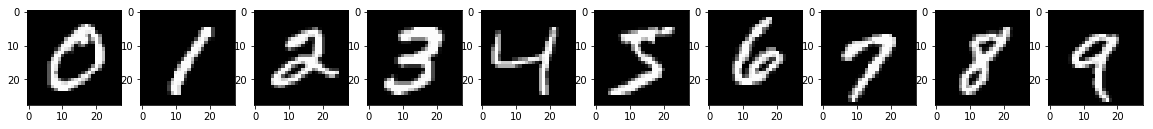

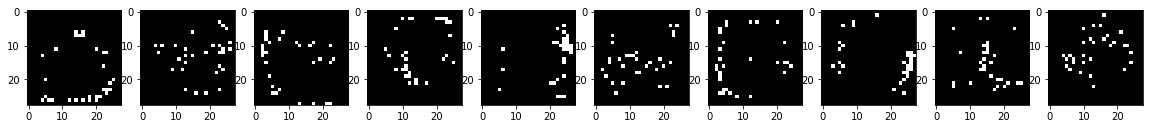

In [14]:
for idx in range(10):
    plt.figure(1, figsize=(20,22))
    plt.subplot(2, 10, idx + 1)
    plt.imshow(imgs[idx].reshape(28,28), cmap='gray')
    plt.figure(2, figsize=(20,22))
    plt.subplot(2, 10, idx + 1)
    plt.imshow(features[9 - idx].reshape(28,28), cmap='gray')

#### DT

In [7]:
mnist_tree = DecisionTreeClassifier(random_state=666)

In [8]:
%%time
mnist_tree.fit(X, y)

CPU times: user 27.8 s, sys: 4.07 ms, total: 27.8 s
Wall time: 27.9 s


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=666,
            splitter='best')

In [9]:
yhat = mnist_tree.predict(_X)
sum(yhat == _y)/len(_y)

0.8772

In [10]:
imp_f = np.argsort(mnist_tree.feature_importances_)[::-1][:30]
imp_f

array([489, 435, 568, 350, 430, 211, 346, 405, 234, 156,  98, 484, 486,
       290, 354, 655, 402, 153, 155, 271, 101, 381, 658, 348, 296, 267,
       297, 514, 300,  95])

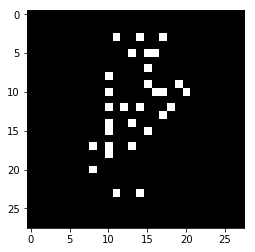

In [11]:
features = np.zeros(shape=(28*28))
features[imp_f] = 1
plt.imshow(features.reshape(28,28),cmap='gray')

## Spambase

In [3]:
spam_data = np.loadtxt('../data/spam/spambase.data', delimiter=',')

In [4]:
y = spam_data[:, -1]
spam_data = spam_data[:, :-1]

In [7]:
spam_lr = LogisticRegression(penalty='l2')

In [8]:
%%time
spam_lr.fit(spam_data, y)

CPU times: user 92.9 ms, sys: 3.97 ms, total: 96.9 ms
Wall time: 97.1 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
yhat = spam_lr.predict(spam_data)

In [10]:
sum(yhat == y)/len(y)

0.9315366224733753

In [25]:
np.argsort(spam_lr.coef_)[0]

array([26, 41, 24, 47, 45, 40, 43, 28, 34, 48, 25, 46, 32, 42, 38, 44, 37,
       30, 50, 29,  0, 39, 10,  1, 11, 49, 12, 33, 31, 36, 54, 56, 55, 18,
        9, 17,  2, 13, 20, 21, 51, 27, 23,  4,  7,  8,  3,  5, 35, 16, 14,
       19, 15, 53, 22,  6, 52])

In [33]:
with open('../data/spam/idx.txt') as infile:
    features = infile.read().splitlines()
np.array(features)[np.argsort(spam_lr.coef_)[0]][::-1][:30]

array(['char_freq_$:            continuous.',
       'word_freq_remove:       continuous.',
       'word_freq_000:          continuous.',
       'char_freq_#:            continuous.',
       'word_freq_free:         continuous.',
       'word_freq_credit:       continuous.',
       'word_freq_addresses:    continuous.',
       'word_freq_business:     continuous.',
       'word_freq_technology:   continuous.',
       'word_freq_over:         continuous.',
       'word_freq_3d:           continuous.',
       'word_freq_order:        continuous.',
       'word_freq_internet:     continuous.',
       'word_freq_our:          continuous.',
       'word_freq_money:        continuous.',
       'word_freq_650:          continuous.',
       'char_freq_!:            continuous.',
       'word_freq_font:         continuous.',
       'word_freq_your:         continuous.',
       'word_freq_report:       continuous.',
       'word_freq_all:          continuous.',
       'word_freq_email:        co

### 20NG

In [3]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
news_train = fetch_20newsgroups(
    data_home='../data/20newsgroups/', 
    subset='train')
news_test = fetch_20newsgroups(
    data_home='../data/20newsgroups/', 
    subset='test')

In [5]:
vectorizer = CountVectorizer(binary=True, stop_words='english')
counts_train = vectorizer.fit_transform(news_train.data)
counts_test = vectorizer.transform(news_test.data)

In [6]:
_20_lr = LogisticRegression(penalty='l2')

In [7]:
%%time
_20_lr.fit(counts_train, news_train.target)

CPU times: user 31.5 s, sys: 1.27 s, total: 32.8 s
Wall time: 16.6 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
yhat = _20_lr.predict(counts_test)

In [9]:
sum(yhat == news_test.target)/len(news_test.target)

0.8203664365374402

In [16]:
coeffs = np.argsort(_20_lr.coef_, axis=1)[:,::-1][:,:30]

In [35]:
reverse_map = {v: k for k, v in vectorizer.vocabulary_.items()}
for i, coeff in enumerate(coeffs):
    features = [reverse_map[c] for c in coeff]
    tag = news_train.target_names[i]
    print('{0}\t{1}\n'.format(tag, features))

alt.atheism	['atheists', 'atheism', 'islamic', 'keith', 'cco', 'umd', 'rushdie', 'bible', 'thoughts', 'religious', 'wingate', 'schneider', 'god', 'political', 'wwc', 'charley', 'allan', 'caltech', 'believing', 'psuvm', 'saturn', 'psu', 'bil', 'okcforum', 'osrhe', 'conner', 'mantis', 'religion', 'atheist', 'islam']

comp.graphics	['graphics', '3d', 'image', 'tiff', 'pov', 'rumours', '3do', 'images', 'animation', 'algorithm', 'format', 'gif', 'polygon', 'viewer', 'points', 'vesa', 'package', 'library', 'surface', 'fractals', 'useful', 'polygons', 'mpeg', 'xv', 'philosophical', 'algorithms', '24', 'sphere', 'routine', 'rgb']

comp.os.ms-windows.misc	['windows', 'win', 'cica', 'win3', 'microsoft', 'file', 'winqvt', 'download', 'characters', 'drivers', 'driver', 'ms', 'borland', 'manager', 'nt', 'printer', 'ini', 'bj200', 'canon', 'files', 'font', 'change', 'try', 'tw', 'helps', 'bmp', 'haapanen', 'problems', 'ftp', 'multiple']

comp.sys.ibm.pc.hardware	['gateway', 'motherboard', '486', 'id